In [1]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [2]:
wtpdata = pd.read_csv(r'1221_wtp_data.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)


                       dem_ID  avg_spent_social  avg_spent_nonsocial  \
0    549ea92efdf99b4ffa5fa208          0.032000             0.030333   
1    55a43687fdf99b7da1908e0f          0.018889             0.018261   
2    55ea70c37480920010aa9982          0.031000             0.029250   
3    56259489ed6e5a0005c80fde          0.026250             0.028571   
4    566c9284d408ea000519c6d7          0.018889             0.017826   
5    56f745653bd969000d170c15          0.033333             0.028929   
6    57e972d7c3e5930001447bb1          0.030000             0.028235   
7    58ab75c4ef58a9000119d16c          0.023684             0.022667   
8    5914b7b50a4b9d0001add64f          0.020870             0.022963   
9    5a78e410ae9a0b0001a97274          0.036190             0.036552   
10   5adbc051f6b58c0001fa3bbe          0.031111             0.029268   
11   5af529ca222e4d0001878444          0.024286             0.024091   
12   5b48f2d0ff7497000125165e          0.030833             0.02

In [3]:
socialtotal= wtpdata.total_spent_social
#calculate group mean for tot spent on social experiences
social_M = mean(socialtotal)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialtotal)))

group mean: 0.746650943396
standard error of the mean: 0.017381271707


In [4]:
nonsocialtotal = wtpdata.total_spent_nonsocial
#calculate group mean for tot spent on non-social experiences


nonsocial_M = mean(nonsocialtotal)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialtotal)))

group mean: 0.693915094340
standard error of the mean: 0.016617834678


In [5]:
#sample size
n = len(wtpdata)
print(n)

212


In [6]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialtotal[i]-nonsocialtotal[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialtotal[i]-nonsocialtotal[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

41.18539999999999 11.180000000000003
0.4386310739027896


In [7]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.03012530583835314


In [8]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

1.7505498314133197


In [9]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

211


In [10]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('t test: Accept null hypothesis that the means are equal.')
else:
	print('t test: Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('p value: Accept null hypothesis that the means are equal.')
else:
	print('p value: Reject the null hypothesis that the means are equal.')

t=1.751, df=211, cv=1.652, p=0.081
t test: Reject the null hypothesis that the means are equal.
p value: Accept null hypothesis that the means are equal.


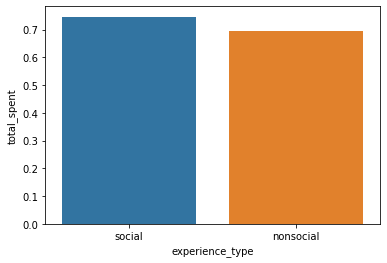

In [11]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'total_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.total_spent, data=wtp_means)

In [19]:
socialprop= wtpdata.prop_social
#calculate group mean for tot spent on social experiences
socialprop_M = mean(socialprop)
print('group mean: %.12f'% (socialprop_M))
print('standard error of the mean: %.12f'% (sem(socialprop)))

group mean: 0.509687161840
standard error of the mean: 0.010137546843


In [18]:
nonsocialprop= wtpdata.prop_nonsocial
#calculate group mean for tot spent on social experiences
nonsocialprop_M = mean(nonsocialprop)
print('group mean: %.12f'% (nonsocialprop_M))
print('standard error of the mean: %.12f'% (sem(nonsocialprop)))

group mean: 0.490312838160
standard error of the mean: 0.010137546843


In [17]:
#Calculate STD
# sum squared difference between observations
d3 = sum([(socialprop[i]-nonsocialprop[i])**2 for i in range(n)])
# sum difference between observations
d4 = sum([socialprop[i]-nonsocialprop[i] for i in range(n)])
print(d3,d4)

# standard deviation of the difference between means
standev2 = np.sqrt((d3 - (d4**2 / n)) / (n - 1))
print(standev2)

#calculate standard error of the difference between the means
sed2 = standev / np.sqrt(n)
print(sed)

# calculate the t statistic
t_stat = (socialprop_M - nonsocialprop_M) / sed
print(t_stat)

# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

18.46798205055133 4.107356620000002
0.29520982010414415
0.03012530583835314
0.6431245472893924
211
t=0.643, df=211, cv=1.652, p=0.521
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


In [ ]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'proportion_spent': [socialprop_M, nonsocialprop_M]})
p
wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.proportion_spent, data=wtp_means)

In [ ]:
# COVID threat vs MSPSS

x = wtpdata['COVID_threat']
y = wtpdata['MSPSS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_threat", y="MSPSS", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID threat vs BRCS

x = wtpdata['COVID_threat']
y = wtpdata['BRCS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_threat", y="BRCS", data=wtpdata,color="red");
sum_mspss.set_ylabel('BRCS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID threat vs STAI

x = wtpdata['COVID_threat']
y = wtpdata['STAI']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_threat", y="STAI", data=wtpdata,color="red");
sum_mspss.set_ylabel('STAI',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID threat vs MSPSS

x = wtpdata['COVID_impact']
y = wtpdata['MSPSS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_impact", y="MSPSS", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID Impact vs BCRS

x = wtpdata['COVID_impact']
y = wtpdata['BRCS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_impact", y="BRCS", data=wtpdata,color="red");
sum_mspss.set_ylabel('BRCS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID impact vs STAI

x = wtpdata['COVID_impact']
y = wtpdata['STAI']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_impact", y="STAI", data=wtpdata,color="red");
sum_mspss.set_ylabel('STAI',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID threat vs total_spent_social

x = wtpdata['COVID_threat']
y = wtpdata['total_spent_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_threat", y="total_spent_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('total_spent_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID threat vs prop_social

x = wtpdata['COVID_threat']
y = wtpdata['prop_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_threat", y="prop_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('prop_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID impact vs total_spent_social

x = wtpdata['COVID_impact']
y = wtpdata['total_spent_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_impact", y="total_spent_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('total_spent_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID impact vs prop_social

x = wtpdata['COVID_impact']
y = wtpdata['prop_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVID_impact", y="prop_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('prop_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID stress vs MSPSS

x = wtpdata['COVIDstress_score']
y = wtpdata['MSPSS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDstress_score", y="MSPSS", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID stress vs BRCS

x = wtpdata['COVIDstress_score']
y = wtpdata['BRCS']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDstress_score", y="BRCS", data=wtpdata,color="red");
sum_mspss.set_ylabel('BRCS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID stress vs STAI

x = wtpdata['COVIDstress_score']
y = wtpdata['STAI']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDstress_score", y="STAI", data=wtpdata,color="red");
sum_mspss.set_ylabel('MSPSS',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID stress vs total_spent_social

x = wtpdata['COVIDstress_score']
y = wtpdata['total_spent_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDstress_score", y="total_spent_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('total_spent_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder

In [ ]:
# COVID stress vs prop_social

x = wtpdata['COVIDstress_score']
y = wtpdata['prop_social']
plt.scatter(x, y) 
plt.show()
covariance = cov(x,y)
print(covariance)
r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)
alpha = 0.05
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="COVIDstress_score", y="prop_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('prop_social',fontsize=10)
#sum_mspss.figure.savefig('new_sum_mspss_scatter.svg') -- this saves the graph to your folder